#### BUSINESS PROBLEM
##### A non-store online retail based in UK is not able to increase sales or identify the loyal customers, retain customers and is not cross selling and upselling to their customers because they do not understand their sales data.

#### CUSTOMER SEGMENTATION AND DISCOVERY
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.(Shopify website)

There are different types of customer segmentation and this includes but not limited to:

1.Demographics, which entails the information on gender, age, familiar status, income.
2.Geographics, includes localised information on city,town, country, zip code
3.Pyschographics, includes information on social class, lifestyle
4.Behavioural, entails the spending, consumption habits for products and services.

The advantages of using Customer Segmentation are as follows:

1.Price Optimization
2.Enchances Competitiveness.
3.Brand Awareness.(Increase goodwill in the market)
4.Acquisition and Retention.
5.Increases Revenue & ROI

#### METHODOLOGY
To resolve the problem as stated, the data set will be analysed using the methods noted below to 
identify customer segments using K-means and RFM (Recency,Frequency,Monetary) with Length of Relationship metric & Cohort
Analysis

Cohort analysis is a kind of behavioral analytics that breaks data set into related groups before analysis. These groups, or cohorts, usually share common characteristics or experiences within a defined time-span.
Cohort analysis allows a company to "see patterns clearly across the life-cycle of a customer (Wikipedia)

Cohort Analysis helps us in the following ways:

1.Understand Retention Rate
2.Estimate LifeTime Value of customers or users
3.Optimize Marketing Product & User Experience

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sidetable
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import datetime as dt
from datetime import timedelta

In [2]:
df = pd.read_excel('Online_Retail.xlsx') 

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### DATA CLEANING & EDA

In [8]:
df.loc[(df.Quantity == -80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [9]:
df.loc[df.UnitPrice == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [10]:
df = df.loc[(df.Quantity > 0) & (df.UnitPrice > 0)]
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [13]:
df.dropna(axis = 0, subset=['CustomerID'],inplace = True)

In [14]:
df.stb.freq(['Country'])[:5]

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,354321,89.051332,354321,89.051332
1,Germany,9040,2.272019,363361,91.323351
2,France,8341,2.096340,371702,93.419690
3,EIRE,7236,1.818621,378938,95.238311
4,Spain,2484,0.624303,381422,95.862613


In [15]:
df.duplicated().sum()

5192

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(392692, 8)

#### RETENTION & COHORT ANALYSIS

In [19]:
def get_month(x) :
    return dt.datetime(x.year,x.month,1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [20]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [21]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Interpretation
CohortMonth 2010-12 (Cohort December 2010) has 855 Unique customers who made transactions that month (CohortIndex 1),

324 customers returned to the transaction the following month (CohortIndex 2),

286 customers returned again the following month (CohortIndex 3), and so on.

#### Retention Rate

In [22]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


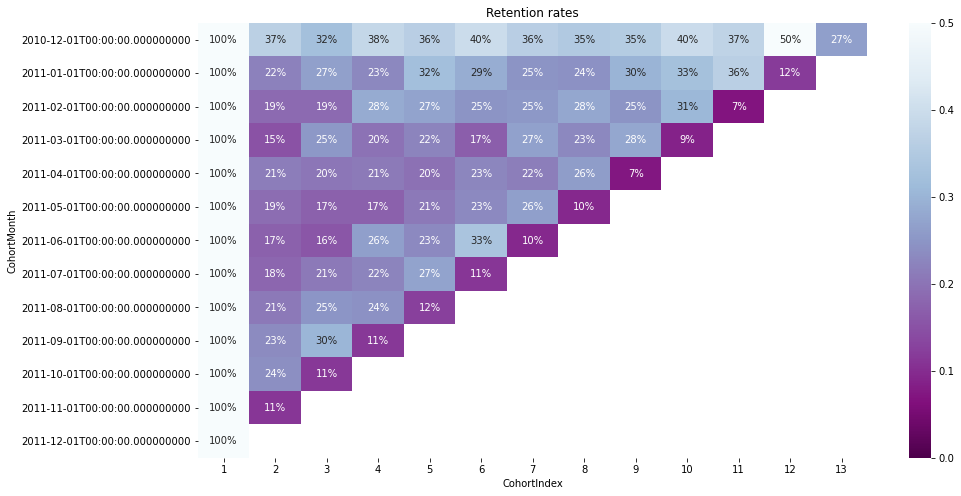

In [23]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

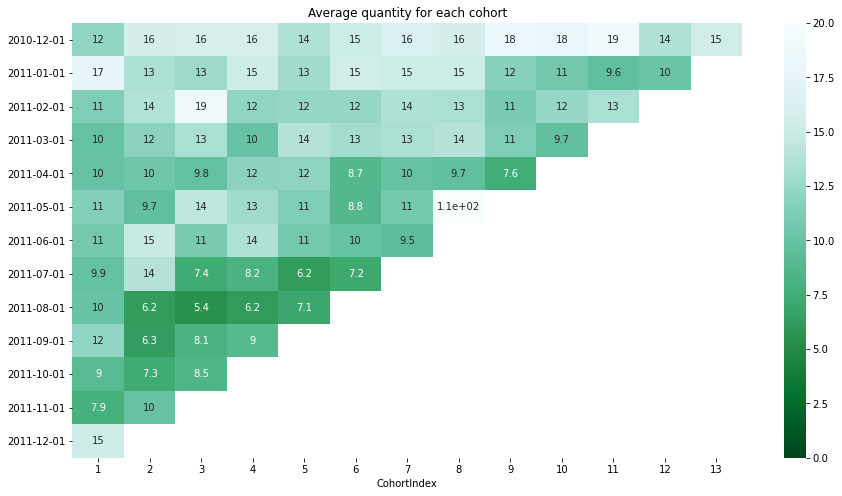

In [24]:
#Average quantity for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

#### MORE EDAs

In [25]:
df['Sales'] = df.Quantity * df.UnitPrice

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [26]:
country_sales = df.groupby('Country')['Sales'].sum().nlargest(5)
country_sales

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Country'>

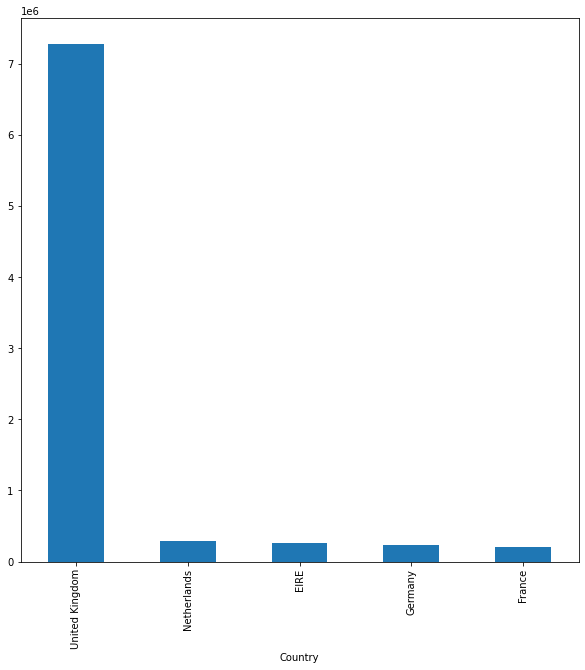

In [27]:
df.groupby('Country')['Sales'].sum().nlargest(5).plot.bar(figsize=(10,10))

In [28]:
customer_sales = df.groupby('CustomerID')['Sales'].sum().nlargest(5)
customer_sales

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
Name: Sales, dtype: float64

Text(0.5, 0, 'CustomerID')

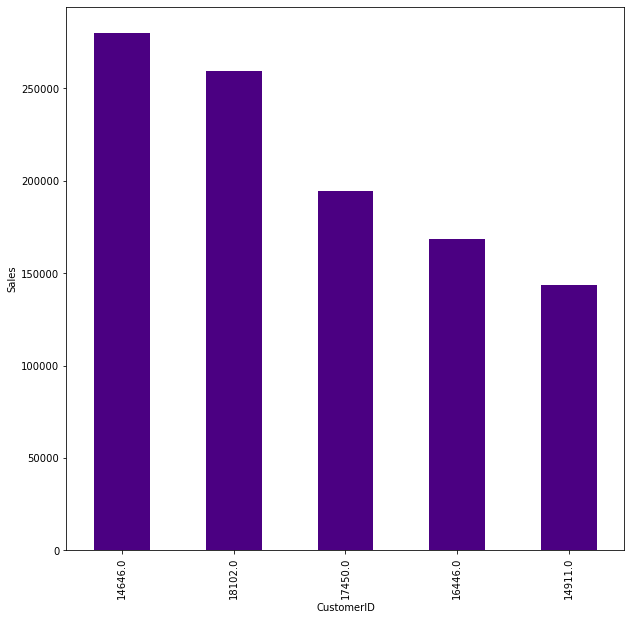

In [29]:
customer_sales = df.groupby('CustomerID')['Sales'].sum().nlargest(5).plot.bar(color = 'indigo', figsize=(10,10))
plt.ylabel('Sales')
plt.xlabel('CustomerID')

In [30]:
df.groupby(['CustomerID', 'Description'])[['Sales']].sum().nlargest(10, 'Sales')

Sales
CustomerID Description                                  
16446.0    PAPER CRAFT , LITTLE BIRDIE         168469.60
12346.0    MEDIUM CERAMIC TOP STORAGE JAR       77183.60
15098.0    PICNIC BASKET WICKER 60 PIECES       39619.50
18102.0    VINTAGE UNION JACK MEMOBOARD         16592.08
16210.0    BLACK RECORD COVER FRAME             16027.92
18102.0    WOOD BLACK BOARD ANT WHITE FINISH    15351.00
           CREAM HEART CARD HOLDER              14089.90
15061.0    REGENCY CAKESTAND 3 TIER             14081.70
17450.0    HEART OF WICKER LARGE                13459.64
           WHITE HANGING HEART T-LIGHT HOLDER   13253.84

In [31]:
df['InvoiceDay'] = df.InvoiceDate.apply(lambda x: dt.datetime(x.year, x.month, x.day))

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [32]:
df.InvoiceDay.max()

Timestamp('2011-12-09 00:00:00')

In [33]:
last_day = df.InvoiceDay.max() + timedelta(days=1)
last_day

Timestamp('2011-12-10 00:00:00')

#### RFM MODEL ANALYSIS
The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase

Monetary Value: How much money a customer spends on purchases 

In [34]:
customer = df.groupby(['CustomerID']).agg({
    'InvoiceDay':lambda x: (last_day - x.max()).days,
    'InvoiceNo': 'count',
    'Sales': 'sum'
})

In [35]:
customer.head()

,InvoiceDay,InvoiceNo,Sales
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [36]:
customer.rename(columns={'InvoiceDay':'Recency',
                         'InvoiceNo': 'Frequency',
                         'Sales': 'Monetary_Value'}, inplace=True)

In [37]:
customer.head(3)

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24


In [38]:
customer.shape

(4338, 3)

In [39]:
customer.describe()

,Recency,Frequency,Monetary_Value
count,4338.000000,4338.000000,4338.000000
mean,93.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.750000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


In [40]:
customer.loc[customer.Recency == 1].sum()

Recency               35.0
Frequency          13401.0
Monetary_Value    729793.4
dtype: float64

In [41]:
customer.loc[customer.Recency == 374].sum()

Recency           6358.00
Frequency          433.00
Monetary_Value    4269.97
dtype: float64

In [42]:
# create labels and assign them to tree percentile groups

r_label = range(4, 0, -1)  
r_group = pd.qcut(customer.Recency, q = 4, labels = r_label)
f_label = range(1, 5)
f_group = pd.qcut(customer.Frequency, q = 4, labels = f_label)
m_label = range(1, 5)
m_group = pd.qcut(customer.Monetary_Value, q = 4, labels = m_label)

In [43]:
#Adding new column

customer['r_score'] = r_group.values
customer['f_score'] =  f_group.values
customer['m_score'] = m_group.values

In [44]:
customer.head()

,Recency,Frequency,Monetary_Value,r_score,f_score,m_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2


In [45]:
# sum up the three columns
customer['customer_segment'] = customer.apply(lambda x: str(x['r_score']) + str(x['f_score']) + str(x['m_score']) , axis = 1)

In [46]:
customer['customer_Score'] = customer[['r_score', 'f_score', 'm_score']].sum(axis = 1)
customer.head()

,Recency,Frequency,Monetary_Value,r_score,f_score,m_score,customer_segment,customer_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,311,17,334.40,1,1,2,1.01.02.0,4


In [47]:
customer.stb.freq(['customer_Score'], style=True)

,customer_Score,count,percent,cumulative_count,cumulative_percent
0,5,519,11.96%,519,11.96%
1,6,461,10.63%,980,22.59%
2,8,459,10.58%,"1,439",33.17%
3,7,456,10.51%,"1,895",43.68%
4,12,443,10.21%,"2,338",53.90%
5,10,428,9.87%,"2,766",63.76%
6,9,410,9.45%,"3,176",73.21%
7,4,391,9.01%,"3,567",82.23%
8,11,390,8.99%,"3,957",91.22%
9,3,381,8.78%,"4,338",100.00%


In [48]:
# ### Assign Loyalty Level to each customer using the Customer Score

Loyalty_Levels = ['Bronze', 'Silver', 'Gold', 'Platinum']
loyalty_levels = pd.qcut(customer.customer_Score, q = 4, labels = Loyalty_Levels)
customer['loyalty_level'] = loyalty_levels


In [49]:
customer.head()

,Recency,Frequency,Monetary_Value,r_score,f_score,m_score,customer_segment,customer_Score,loyalty_level
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Silver
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12,Platinum
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8,Gold
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Gold
12350.0,311,17,334.40,1,1,2,1.01.02.0,4,Bronze


<AxesSubplot:xlabel='loyalty_level', ylabel='count'>

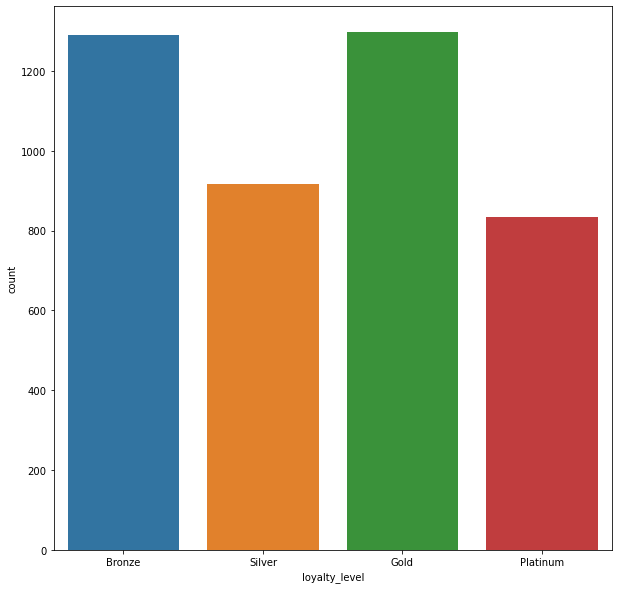

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x= customer.loyalty_level)

#### DATA PREPROCESSING

In [51]:
## Scaling & Normalization

In [52]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x
# apply the function to Recency and MonetaryValue column 
customer['Recency'] = [neg_to_zero(x) for x in customer.Recency]
customer['Monetary_Value'] = [neg_to_zero(x) for x in customer.Monetary_Value]
# unskew the data
customer_log = customer[['Recency', 'Frequency', 'Monetary_Value']].apply(np.log, axis = 1).round(3)

In [53]:
# scale the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_log)
# transform into a dataframe
customer_scaled = pd.DataFrame(customer_scaled, index = customer.index, columns = customer_log.columns)

In [54]:
customer_scaled

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,1.435500,-2.779971,3.700239
12347.0,-1.953082,1.160365,1.413494
12348.0,0.383073,-0.179833,0.719941
12349.0,-0.619479,0.468308,0.702503
12350.0,1.401527,-0.634895,-0.613267
...,...,...,...
18280.0,1.320571,-1.036198,-1.101529
18281.0,1.009758,-1.306509,-1.738805
18282.0,-1.244718,-0.898392,-1.112626


C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

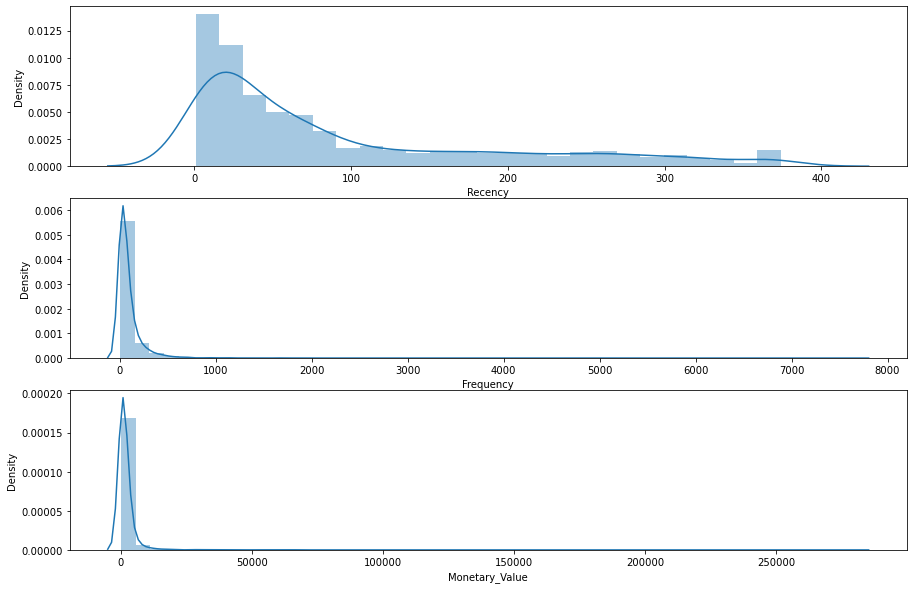

In [55]:
##Before Preprocessing
plt.figure(figsize=(15, 10))

columns = ['Recency','Frequency','Monetary_Value']
n = 0

for col in columns:
    n = n + 1
    plt.subplot(3,1,n)
    sns.distplot(customer[col])
    
plt.show()

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

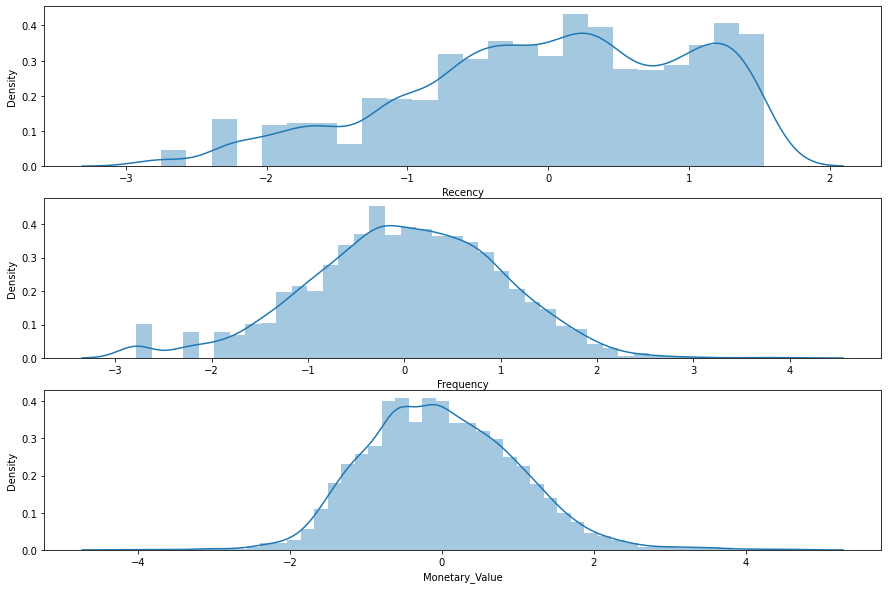

In [56]:
### After preprocessing
plt.figure(figsize=(15, 10))

columns = ['Recency','Frequency','Monetary_Value']
n = 0

for col in columns:
    n = n + 1
    plt.subplot(3,1,n)
#     sns.distplot(customer[col])
    sns.distplot(customer_scaled[col])
    
plt.show()

#### MODEL BUILDING

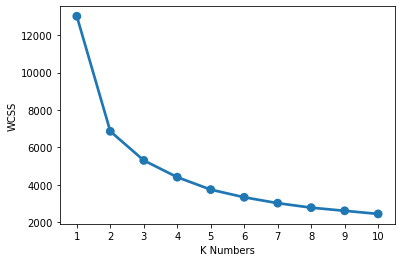

In [57]:
# the Elbow method

wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    kmeans.fit(customer_scaled)
    wcss[k] = kmeans.inertia_
# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [58]:
# clustering
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(customer_scaled)

# Assign the clusters to datamart
customer['K_Cluster'] = clus.labels_
customer.head()

,Recency,Frequency,Monetary_Value,r_score,f_score,m_score,customer_segment,customer_Score,loyalty_level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Silver,2
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12,Platinum,0
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8,Gold,2
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Gold,2
12350.0,311,17,334.40,1,1,2,1.01.02.0,4,Bronze,1


In [69]:
### CLUSTER VALIDATION

In [59]:
X = customer_scaled.iloc[:, [0, 1, 2]].values

For n_clusters = 2 The average silhouette_score is : 0.3952871546404954
For n_clusters = 3 The average silhouette_score is : 0.3033887996461411
For n_clusters = 4 The average silhouette_score is : 0.30095490894113636
For n_clusters = 5 The average silhouette_score is : 0.2787328581750258
For n_clusters = 6 The average silhouette_score is : 0.27632485864433154


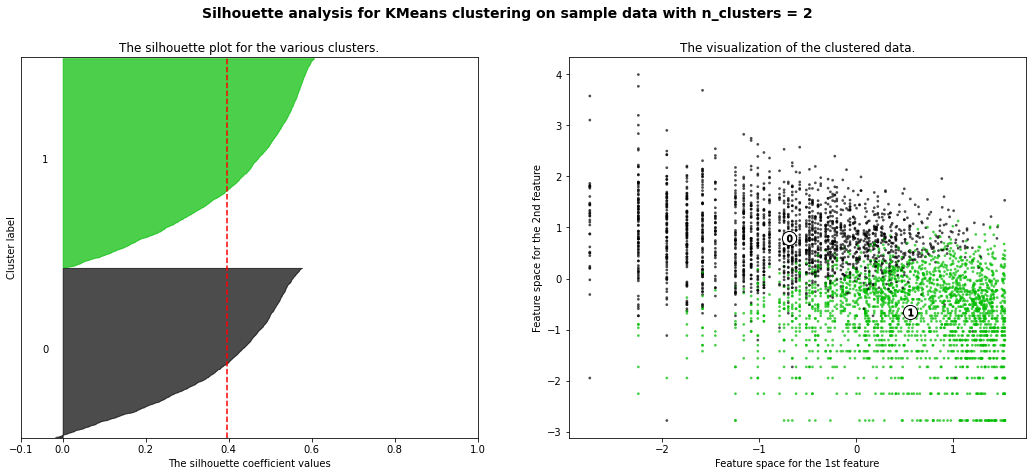

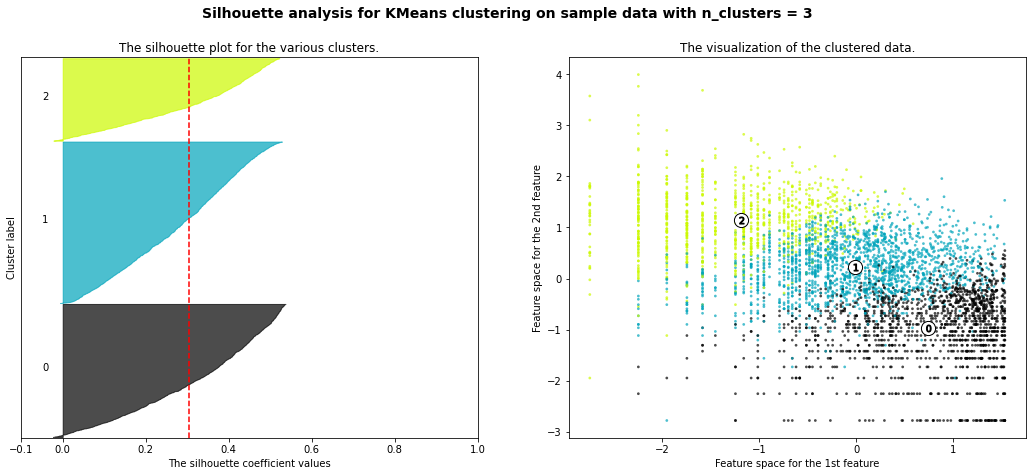

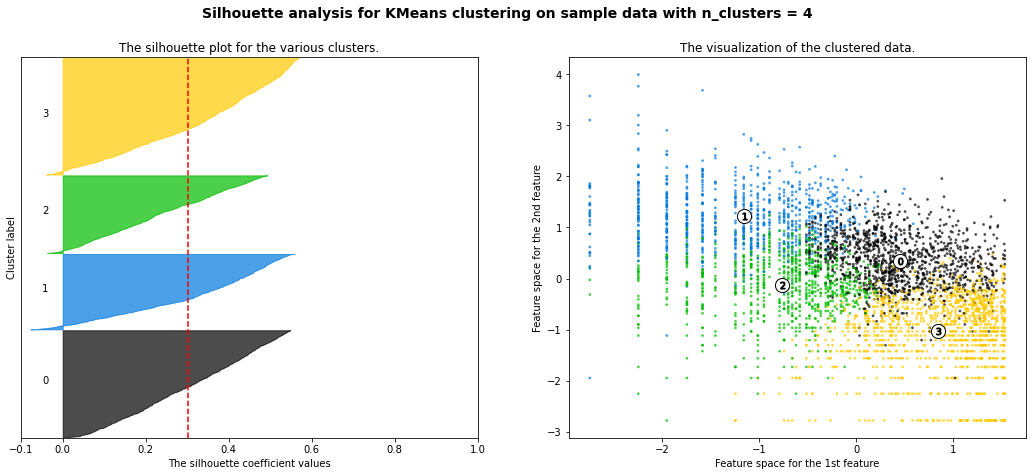

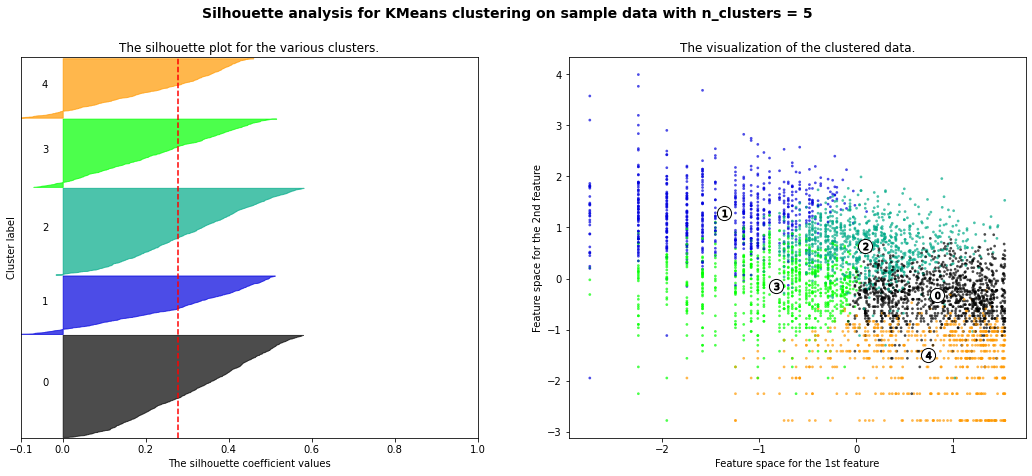

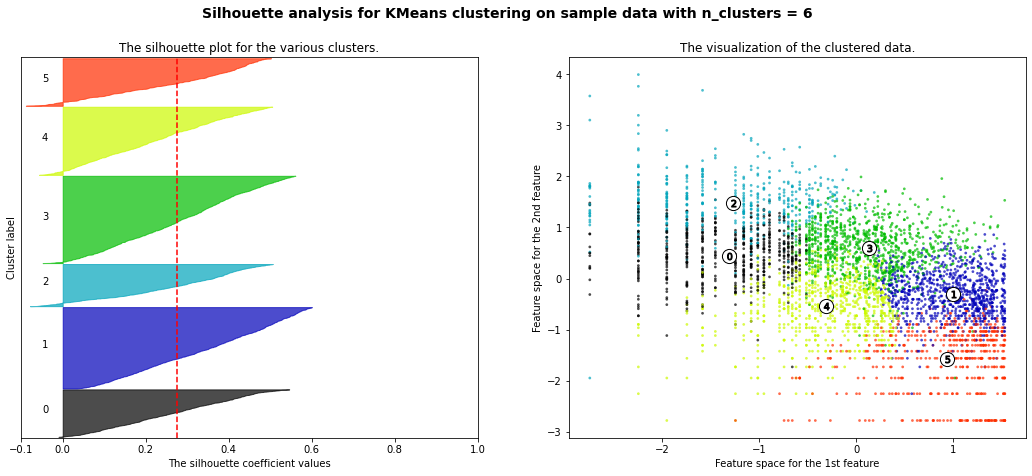

In [60]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()